# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df=pd.read_csv("class_data.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.051786,0.260052,-0.143894,7.300212,0.960782,1.716721,10.379783,1.307553,2.963135,False
1,3.716080,-2.045396,-0.390888,6.635246,-0.001133,2.071157,15.180013,-0.637435,4.500656,False
2,8.099124,0.851044,-0.244666,9.275884,-0.001133,-0.090422,16.868637,0.002672,3.055934,False
3,8.316766,0.549745,-0.003657,8.059333,0.640702,-0.776798,18.436525,2.154434,4.628770,False
4,9.092223,-0.466673,-0.465295,6.546600,-0.645921,-0.340904,11.558279,-2.180838,4.075076,False
...,...,...,...,...,...,...,...,...,...,...
3168,6.069616,-0.296897,0.467229,7.747548,0.332854,-0.124148,12.067619,-0.377939,3.669712,True
3169,4.668102,-0.082362,2.917703,7.166639,0.724984,1.246841,13.894419,0.019648,4.435821,True
3170,7.808856,-0.086288,-0.539485,8.061362,-0.062391,-0.414841,19.903225,0.018435,2.798243,True
3171,9.419510,-0.629769,1.269127,7.350233,-0.062391,0.076256,11.039070,0.219951,3.298876,True


### Split dataset

In [3]:
X_train_chose =df[['ph','Sulfate','Hardness','Chloramines','Solids']]
y_train_chose = df['Potability']

## Label Encode

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train_chose= label_encoder.fit_transform(y_train_chose)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_chose,y_train_chose,test_size=0.2)

## Modeling

In [6]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_probabilities = None
        self.feature_probabilities = None
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        
        # Calculate class probabilities
        self.class_probabilities = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_probabilities[i] = np.sum(y == c) / len(y)
        
        # Calculate feature probabilities
        self.feature_probabilities = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.feature_probabilities[i, :] = (X_c.sum(axis=0) + 1) / (np.sum(X_c) + n_features)
    
    def predict(self, X):
        y_pred = []
        for x in X:
            probabilities = []
            for i, c in enumerate(self.classes):
                probability = np.log(self.class_probabilities[i])
                for j in range(len(x)):
                    probability += np.log(self.feature_probabilities[i, j] ** x[j])
                probabilities.append(probability)
            y_pred.append(self.classes[np.argmax(probabilities)])
        return y_pred

In [7]:
nb = NaiveBayes()
nb.fit(X_train.values, y_train)
y_pred = nb.predict(X_test.values)

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6220472440944882

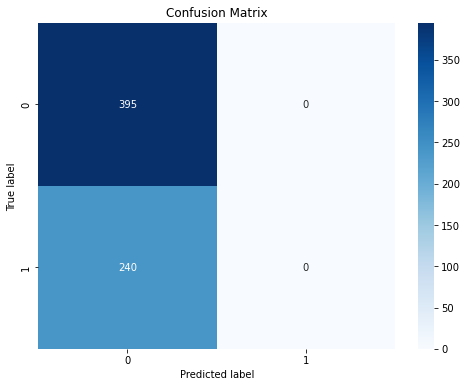

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()